# Classificação Bart Homer

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
from keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Activation, MaxPooling2D, Flatten
from keras.metrics import categorical_accuracy
from keras.models import Sequential
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras import utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras import backend as K
from imutils import paths
import cv2
import random
import os


Using TensorFlow backend.


### Gerador de imagens

In [2]:
aug = ImageDataGenerator(rescale=1./255,
                         rotation_range=7,
                         horizontal_flip=True,
                         shear_range=0.2,
                         height_shift_range=0.2,
                         zoom_range=0.2)

aug_test = ImageDataGenerator(rescale=1./255)

In [3]:
data_train = aug.flow_from_directory('/home/matheusjerico/Documentos/DSA/05. MachineLearning/Cap-12-IntroduçãoDeepLearning/dataset_udemy/dataset_personagens/training_set',
                                     target_size=(128,128),
                                     batch_size=32,
                                     class_mode= 'binary')
data_test = aug_test.flow_from_directory('/home/matheusjerico/Documentos/DSA/05. MachineLearning/Cap-12-IntroduçãoDeepLearning/dataset_udemy/dataset_personagens/test_set',
                                         target_size = (128,128),
                                         batch_size=32,
                                         class_mode='binary')

Found 196 images belonging to 2 classes.
Found 73 images belonging to 2 classes.


### Criando o modelo

In [4]:
input_Shape = (128, 128, 3)
chanDim = -1

if K.image_data_format == 'channels_first':
    input_Shape = (3, 128, 128)
    chanDim = 1
    
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = input_Shape, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
          
model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
          
model.add(Flatten())
    
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(12))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(1, activation = 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Compilando e Fit no modelo

In [8]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

H = model.fit_generator(data_train,
                    steps_per_epoch=196,
                    epochs=20,
                    validation_data=data_test,
                    validation_steps=10)

Epoch 1/20
196/196 [==============================] - 251s 1s/step - loss: 0.6775 - acc: 0.5917 - val_loss: 0.6806 - val_acc: 0.5789
Epoch 2/20
196/196 [==============================] - 250s 1s/step - loss: 0.6718 - acc: 0.6019 - val_loss: 0.6760 - val_acc: 0.5817
Epoch 3/20
196/196 [==============================] - 254s 1s/step - loss: 0.6396 - acc: 0.6184 - val_loss: 0.6538 - val_acc: 0.6972
Epoch 4/20
196/196 [==============================] - 256s 1s/step - loss: 0.5865 - acc: 0.6905 - val_loss: 0.5619 - val_acc: 0.8114
Epoch 5/20
196/196 [==============================] - 244s 1s/step - loss: 0.5586 - acc: 0.7270 - val_loss: 0.5725 - val_acc: 0.7092
Epoch 6/20
196/196 [==============================] - 242s 1s/step - loss: 0.5391 - acc: 0.7466 - val_loss: 0.5301 - val_acc: 0.7769
Epoch 7/20
196/196 [==============================] - 7912s 40s/step - loss: 0.5282 - acc: 0.7523 - val_loss: 0.5189 - val_acc: 0.7807
Epoch 8/20
196/196 [==============================] - 260s 1s/step 

### Prevendo e Avaliando o modelo

In [9]:
scores = model.evaluate_generator(data_test, workers=10, steps= 190)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.2443325163072964
Test accuracy: 0.8492766151132709


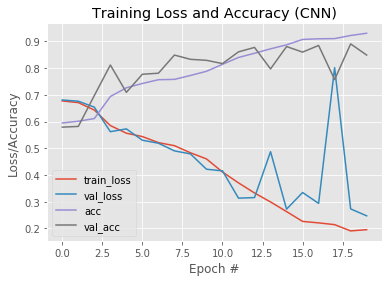

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plocando acc e loss em relação aos epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(H.history['loss'], label='train_loss')
plt.plot(H.history['val_loss'], label='val_loss')
plt.plot(H.history['acc'], label='acc')
plt.plot(H.history['val_acc'], label='val_acc')
plt.title("Training Loss and Accuracy (CNN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [24]:
predIdxs = model.predict_generator(data_test,steps=120)


In [26]:
np.around(predIdxs)

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [1.],
       [1.]], dtype=float32)